<a href="https://colab.research.google.com/github/junghoum/Hello-world/blob/main/N421_count-based_representation/N421a_Count_based_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

## 1. 데이터 전처리 (Text preprocessing)

In [1]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- 중복값을 제거하세요.

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'title', 'company', 'description', 'url'], dtype='object')

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['url'], axis=1)
df.head()

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...


In [5]:
df

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...
...,...,...,...
1295,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...
1296,Senior Data Scientist,Takeda Pharmaceuticals,Job Description\nOBJECTIVES:\nEffectively work...
1297,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...
1298,Senior Data Scientist,Cox Automotive,"Cox Automotive, a subsidiary of Cox Enterprise..."


### 1) 토큰을 정제합니다.

- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [6]:
df = df.drop_duplicates(['description'])

In [7]:
df.shape

(757, 3)

In [8]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [9]:
# 데이터 소문자로 바꿔주기

df = df.applymap(str.lower)
df.head()

,title,company,description
0,data scientist (structured products),equitrust life insurance company,job details\ndescription\nessential duties and...
2,"specialist, data science",nationwide,as a team member in the finance and internal a...
4,sr. data scientist (remote),american credit acceptance,overview:\namerican credit acceptance seeks a ...
5,data scientist associate sr (dads06) btb - leg...,"jpmorgan chase bank, n.a.",j.p. morgan's corporate & investment bank (cib...
6,data scientist,vystar credit union,"at vystar, we offer competitive pay, an excell..."


In [10]:
# 파이썬 정규표현식 패키지 이름은 re
import re

regex = r"[^ a-z0-9\n]"
subst = ""

In [11]:
def tokenize(text):
    """text 문자열을 의미있는 단어 단위로 list에 저장합니다.
    Args:
        text (str): 토큰화 할 문자열
    Returns:
        list: 토큰이 저장된 리스트
    """
    # 정규식 적용
    tokens = re.sub(regex, subst, text)

    # split
    tokens = tokens.split()
    
    return tokens

In [12]:
df['tokens'] = df['description'].apply(tokenize)
df['tokens'].head()

0    [job, details, description, essential, duties,...
2    [as, a, team, member, in, the, finance, and, i...
4    [overview, american, credit, acceptance, seeks...
5    [jp, morgans, corporate, investment, bank, cib...
6    [at, vystar, we, offer, competitive, pay, an, ...
Name: tokens, dtype: object

In [13]:
df[-1:]

,title,company,description,tokens
1299,senior data scientist,spring discovery,tl;dr\nspring is accelerating the discovery of...,"[tldr, spring, is, accelerating, the, discover..."


### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [14]:
from collections import Counter

#Counter 객체는 리스트요소의 값과 요소의 객수를 카운트 하여 저장
#카운터 객체는 .update 메소드로 계속 업데이트 가능

word_counts = Counter()

# 토큰화된 각 description을 카운터 객체에 업데이트
df['tokens'].apply(lambda x: word_counts.update(x))

# 가장 많이 존재하는 단어 top10
word_counts.most_common(10)

[('and', 21863),
 ('to', 12694),
 ('the', 10538),
 ('of', 8839),
 ('data', 7425),
 ('in', 6769),
 ('a', 6436),
 ('with', 5727),
 ('for', 4132),
 ('or', 3812)]

In [15]:
def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')


In [16]:
wc = word_count(df['tokens'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
73,and,755,21863,1.0,0.056454,0.056454,0.997358
209,to,754,12694,2.0,0.032778,0.089231,0.996037
172,the,745,10538,3.0,0.027211,0.116442,0.984148
82,of,745,8839,4.0,0.022824,0.139266,0.984148
133,data,740,7425,5.0,0.019172,0.158438,0.977543
76,in,748,6769,6.0,0.017479,0.175917,0.988111
162,a,739,6436,7.0,0.016619,0.192536,0.976222
11,with,742,5727,8.0,0.014788,0.207323,0.980185
596,for,727,4132,9.0,0.010669,0.217993,0.960370
212,or,708,3812,10.0,0.009843,0.227836,0.935271


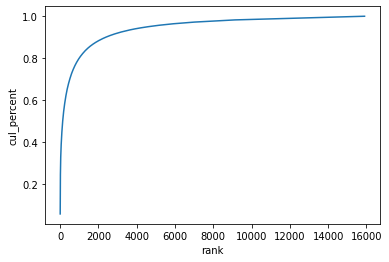

In [17]:
# 누적 분포 그래프

import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc);

In [18]:
!pip install squarify

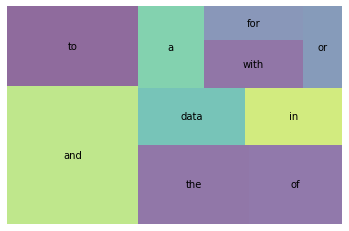

In [19]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 10]
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [20]:
df.columns

Index(['title', 'company', 'description', 'tokens'], dtype='object')

In [21]:
print(nlp.Defaults.stop_words)


{'nine', 'many', 'other', 'hundred', 'whereas', 'who', 'amongst', 'indeed', 'may', 'between', 'being', 'beforehand', '‘re', 'whether', 'former', 'become', 'various', "'s", 'make', 'only', 'my', 'via', 'whoever', 'although', 'thru', 'out', 'in', 'did', 'third', 'ca', 'ten', 'done', 'where', '‘ll', 'along', 'at', 'thus', 'no', 'her', 'afterwards', 'without', '’m', 'might', 'none', 'anyhow', 'them', 'more', 'because', 'front', 'move', 'eight', 'we', 'three', 'neither', 'thereafter', 'under', 'toward', 'will', 'against', 'mine', 'therefore', '‘ve', 'twenty', 'seem', 'beside', '‘d', 'same', 'these', "'m", 'last', 'least', 'every', 'became', 'thereby', 'formerly', 'even', '‘m', 'about', 'somewhere', 'except', 'from', 'either', 'it', 'which', 'upon', 'seemed', 'why', 'could', 'you', 'into', 'much', 'once', 'an', 'have', 'while', 'nevertheless', 'and', 'of', 'off', 'would', 'six', '’d', 'when', 'everyone', 'both', 'has', 'using', 'herein', 'already', 'throughout', "'ll", 'five', 'anything', 'u

In [22]:
STOP_WORDS = nlp.Defaults.stop_words.union(['data','work'])

In [23]:
tokens = []

for doc in df['tokens']:
    
    doc_tokens = []
    
    for token in doc: 
        if token not in STOP_WORDS:
            doc_tokens.append(token)
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

#print(STOP_WORDS)

In [24]:
# tokens = []

# for doc in df['tokens']):
    
#     doc_tokens = []
    
#     for token in doc: 
#         if token.text.lower() not in STOP_WORDS:
#             doc_tokens.append(tokens)
   
#     tokens.append(doc_tokens)
    
# df['tokens'] = tokens

In [25]:
wc = word_count(df['tokens'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
80,experience,705,3450,1.0,0.014410,0.014410,0.931308
462,business,536,2064,2.0,0.008621,0.023030,0.708058
58,science,611,1648,3.0,0.006883,0.029914,0.807133
105,team,588,1625,4.0,0.006787,0.036701,0.776750
250,learning,526,1596,5.0,0.006666,0.043367,0.694848
196,analysis,516,1349,6.0,0.005634,0.049001,0.681638
143,skills,547,1251,7.0,0.005225,0.054226,0.722589
483,machine,470,1152,8.0,0.004812,0.059038,0.620872
440,analytics,428,1136,9.0,0.004745,0.063783,0.565390
118,models,459,1034,10.0,0.004319,0.068101,0.606341


### 5) Lemmatization 사용 효과를 분석해 봅니다.



- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**

In [26]:
# Lemmatization 과정 함수
def get_lemmas(text):
  lemmas = []

  doc = nlp(text)

  for token in doc:
    if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [27]:
df['description2'] = df['description'].apply(get_lemmas)
df['description2'].head()

0         [job]
2            []
4    [overview]
5         [j.p]
6            []
Name: description2, dtype: object

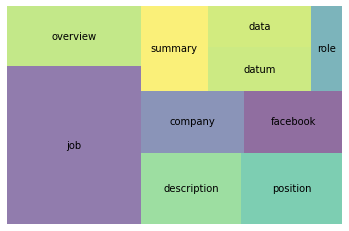

In [28]:
wc = word_count(df['description2'])
wc_top20 = wc[wc['rank'] <= 10]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6 )
plt.axis('off')
plt.show()

In [29]:
wc = word_count(df['description2'])

wc.head(10) # 왜 맨 첫번째는 ' ' 일까!

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
0,job,56,56,1.0,0.115226,0.115226,0.073976
1,overview,21,21,2.0,0.043210,0.158436,0.027741
21,description,19,19,3.0,0.039095,0.197531,0.025099
27,position,19,19,4.0,0.039095,0.236626,0.025099
12,company,17,17,5.0,0.034979,0.271605,0.022457
16,facebook,16,16,6.0,0.032922,0.304527,0.021136
24,summary,15,15,7.0,0.030864,0.335391,0.019815
14,datum,12,12,8.0,0.024691,0.360082,0.015852
26,data,11,11,9.0,0.022634,0.382716,0.014531
6,role,7,7,10.0,0.014403,0.397119,0.009247


## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 9) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - 답은 88번 인덱스를 포함합니다.
    - `max_features = 3000` 으로 설정합니다.
    - [88, 90, 91, 93, 94] 형태로 답을 입력해주세요

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features = 3000)

# Fit 후 dtm을 만듭니다.(문서, 단어마다 tf-idf 값을 계산합니다)
dtm_tfidf = tfidf.fit_transform(df['description'])

dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())
dtm_tfidf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,10,100,11,12,14,15,18,19,20,200,2017,2018,2019,2020,22,24,25,30,300,31,35,3m,40,400,401,401k,50,500,5000,60,600,75,80,90,aa,ab,abilities,ability,...,wellness,whip,wholly,wi,wide,widely,wildlife,willing,willingness,winning,women,word,work,workday,worked,worker,workers,workflow,workflows,workforce,working,workplace,workplaces,works,world,worldwide,wrangling,wri,write,writing,written,www,year,years,yelp,yes,york,yrs,zillow,zulily
0,0.0,0.000000,0.05272,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058637,0.052353,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.069356,0.0,0.0,0.000000,0.062315,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.051677,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.023379,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.072438,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.031375,0.027418,0.0,0.0,0.000000,0.098541,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.071503,0.000000,0.0,0.000000,0.012252,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.018485,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056214,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058743,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.062152,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.058510,0.000000,0.000000,0.017488,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.033337,0.00000,0.035082,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.042929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043708,...,0.000000,0.0,0.0,0.0,0.053924,0.000000,0.0,0.000000,0.038602,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.038116,0.000000,0.000000,0.0,0.030795,0.103499,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.060084,0.013012,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.027691,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030387,0.0,0.0,0.0,0.0,0.0,0.0,0.030644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023711,0.010585,...,0.000000,0.0,0.0,0.0,0.019588,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.028417,0.067195,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.020896,0.000000,0.0,0.044746,0.000000,0.000000,0.0,0.0,0.0,0.021826,0.000000,0.000000,0.000000,0.047268,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
753,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020719,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.082207,0.0,0.065596,0.0,0.0,0.0,0.0,0.000000,0.000000,0.046606,0.0,0.000000,0.098124,0.05

In [31]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf)

nn.kneighbors([dtm_tfidf.iloc[88]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


(array([[0.        , 1.1283426 , 1.18893646, 1.19442548, 1.19937307]]),
 array([[ 88,  40, 121,  68, 680]]))

## 3. TF-IDF 이용한 텍스트 분류 진행하기

TF-IDF를 이용해 문장 혹은 문서를 벡터화한 경우, 이 벡터값을 이용해 문서 분류 태스크를 진행할 수 있습니다. 

현재 다루고 있는 데이터셋에는 label이 존재하지 않으므로, title 컬럼에 "Senior"가 있는지 없는지 여부를 통해 Senior 직무 여부를 분류하는 작업을 진행해보겠습니다.

### 1) title 컬럼에 "Senior" 문자열이 있으면 1, 없으면 0인 "Senior"라는 새로운 컬럼을 생성해주세요.

문항 7) 새롭게 만든 Senior 컬럼에서 값이 1인 (Senior O) 데이터의 개수는?

In [32]:
df.head()

,title,company,description,tokens,description2
0,data scientist (structured products),equitrust life insurance company,job details\ndescription\nessential duties and...,"[job, details, description, essential, duties,...",[job]
2,"specialist, data science",nationwide,as a team member in the finance and internal a...,"[team, member, finance, internal, audit, depar...",[]
4,sr. data scientist (remote),american credit acceptance,overview:\namerican credit acceptance seeks a ...,"[overview, american, credit, acceptance, seeks...",[overview]
5,data scientist associate sr (dads06) btb - leg...,"jpmorgan chase bank, n.a.",j.p. morgan's corporate & investment bank (cib...,"[jp, morgans, corporate, investment, bank, cib...",[j.p]
6,data scientist,vystar credit union,"at vystar, we offer competitive pay, an excell...","[vystar, offer, competitive, pay, excellent, b...",[]


In [39]:
df1 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')

In [40]:
df['Senior'] = df1['title'].apply(lambda x: 1 if 'Senior' in x else 0)
df['Senior'].value_counts()

0    662
1     95
Name: Senior, dtype: int64

문항 8) sklearn의 `train_test_split`을 통해 train 데이터와 valid 데이터로 나눈 후, `sklearn`의 `DecisionTreeClassifier`를 이용해 분류를 진행해주세요. 

단, x값은 위에서 학습한 dtm_tfidf를 그대로 이용해주세요. train_test_split과 DecisionTreeClassifier의 random_state을 42로 고정하고, test_size는 0.1로 설정해주세요.

학습을 완료한 후, test 데이터에 대한 예측을 진행하고 label 1에 대한 precision과 recall 값을 적어주세요

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(dtm_tfidf, df['Senior'], test_size = 0.1, random_state = 42)

model = DecisionTreeClassifier(random_state = 42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [49]:
from sklearn.metrics import precision_score, recall_score

print('Precision scrore: ', precision_score(y_test, y_pred))
print('Recall scrore: ', recall_score(y_test, y_pred))

Precision scrore:  0.26666666666666666
Recall scrore:  0.5
